# Inteligência Computacional
## Trabalho Final - Classificação de Imagens
### Alunos:
 - Felipe Martins Lemos de Morais
 - Maria Izamara Coutinho
 - Gabriel Siqueira
 - Fernando Garamvolgyi
 - Vinícius Nascimento
 - Pedro Santos

Neste trabalho final será realizada a classificação de imagens, que é a determinação de uma classe de uma figura com base nos seus pixels. Para isso, será utilizado o dataset MNIST, que possui 60 mil imagens em tom de cinza, de tamanho 28x28 pixels.

## Importando o Dataset e Analisando o formato dos dados

In [ ]:
# utilizando o dataset disponível no Keras
from keras.datasets import mnist

# carregando o dataset de fato
(X_treino, y_treino), (X_teste, y_teste) = mnist.load_data()

# exibindo o formato dos dados
print(f'Treino: X={X_treino.shape}, y={y_treino.shape}')
print(f'Teste: X={X_teste.shape}, y={y_teste.shape}')

11490434/11490434 [==============================] - 1s 0us/step
Treino: X=(60000, 28, 28), y=(60000,)
Teste: X=(10000, 28, 28), y=(10000,)


Como pode ser visto acima, estão presentes 60 mil imagens no conjunto de treino e 10 mil imagens no conjunto de teste, todas elas com formato 28x28 pixels.

## Exibindo algumas imagens

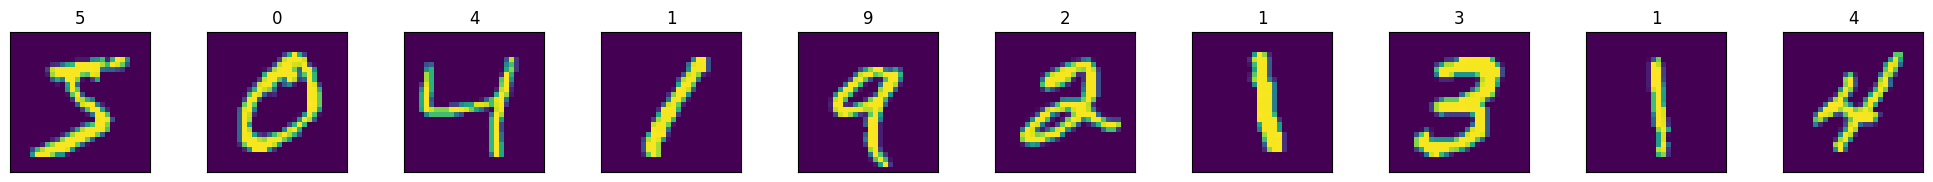

In [ ]:
from matplotlib import pyplot

# definindo um vetor para as classes
classes = [0,1,2,3,4,5,6,7,8,9]

fig = pyplot.figure(figsize=(25, 4))
for i in range(10):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    pyplot.imshow(X_treino[i])
    ax.set_title(classes[y_treino[i]])

## Ajustando os dados para o treinamento

### Transformando os vetores de classes com One Hot Encoding

Inicialmente, é possível perceber que os vetores com as classes das imagens possuem, em cada posição, um número inteiro de 0 a 10:

In [ ]:
print(f'y_treino:\n\n{y_treino}\n')
print(f'y_teste:\n\n{y_teste}\n')
print(f'Min y_treino: {min(y_treino)}')
print(f'Max y_treino: {max(y_treino)}\n')
print(f'Min y_teste: {min(y_teste)}')
print(f'Max y_teste: {max(y_teste)}')

y_treino:

[5 0 4 ... 5 6 8]

y_teste:

[7 2 1 ... 4 5 6]

Min y_treino: 0
Max y_treino: 9

Min y_teste: 0
Max y_teste: 9


Diante disso, para facilitar o processo de treinamento, será feito um One Hot Enconding, que consiste em, para cada posição, definir um vetor cujo tamanho é a quantidade de classes e cuja posição é 0 se o elemento não pertencer àquela classe e 1 se o elemento pertecer àquela classe. Assim, ao obtermos os resultados dos 10 neurônios das camadas de saída das redes neurais, será mais fácil realizar a comparação com o resultado.

In [ ]:
# Utilizando a função to_categorial do keras para realizar o One Hot Enconding
from keras.utils import to_categorical
y_treino = to_categorical(y_treino)
y_teste = to_categorical(y_teste)

In [ ]:
print(f'y_treino:\n\n{y_treino}\n')
print(f'y_teste:\n\n{y_teste}\n')

y_treino:

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]

y_teste:

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



### Normalizando os valores de cada Pixel

Inicialmente, é possível perceber que os valores de pixel para cada imagem no conjunto de dados são valores inteiros entre 0 e 255, que representam pixels sem cor ou totalmente coloridos, respectivamente. Isso pode confirmado abaixo, onde são exibidos o mínimo e o máximo de alguns exemplos do dataset:

In [ ]:
print(f'X_treino:\n\n{X_treino[13][13][:100]}\n')
print(f'X_teste:\n\n{X_teste[13][13][:100]}')

X_treino:

[  0   0   0   0   0   0   0   0  76 252 253 223  37   0  48 174 252 252
 242 214 253 199  31   0   0   0   0   0]

X_teste:

[  0   0   0   0   0   0   0  70 252 252 192  17   0   0   0   0   0   0
   0 116 253 223  25   0   0   0   0   0]


Diante disso, será feita uma normalização nos valores de pixel, redimensionando-os para o intervalo [0,1]. Para isso, primeiro será convertido o tipo de dados de inteiros para floats e, em seguida, serão divididos os valores de pixel pelo valor máximo.

In [ ]:
# primeiro converte de inteiro para float
X_treino = X_treino.astype('float32')
X_teste = X_teste.astype('float32')

# normaliza os valores de pixels colocando no intervalo entre 0 e 1
X_treino = X_treino / 255.0
X_teste = X_teste / 255.0

Para validar, são exibidos os mesmos valores de pixels mostrados anteriormente:

In [ ]:
print(f'X_treino:\n\n{X_treino[13][13][:100]}\n')
print(f'X_teste:\n\n{X_teste[13][13][:100]}')

X_treino:

[0.         0.         0.         0.         0.         0.
 0.         0.         0.29803923 0.9882353  0.99215686 0.8745098
 0.14509805 0.         0.1882353  0.68235296 0.9882353  0.9882353
 0.9490196  0.8392157  0.99215686 0.78039217 0.12156863 0.
 0.         0.         0.         0.        ]

X_teste:

[0.         0.         0.         0.         0.         0.
 0.         0.27450982 0.9882353  0.9882353  0.7529412  0.06666667
 0.         0.         0.         0.         0.         0.
 0.         0.45490196 0.99215686 0.8745098  0.09803922 0.
 0.         0.         0.         0.        ]


## Definição de funções auxiliares para o processo de treinamento e avaliação

In [ ]:
# Função que, a partir da história de um treinamento, plota os gráficos de loss e acurácia
def plotar_metricas_treinamento(treinamento):

    pyplot.Figure()
    pyplot.title('Categorical Cross Entropy Loss')
    pyplot.xlabel('Épocas')
    pyplot.ylabel('Loss')
    pyplot.plot(treinamento.history['loss'], color='blue', label='treino')
    pyplot.plot(treinamento.history['val_loss'], color='orange', label='teste')
    pyplot.legend()
    pyplot.show()

    pyplot.Figure()
    pyplot.title('Acurácia')
    pyplot.xlabel('Épocas')
    pyplot.ylabel('Acurácia')
    pyplot.plot(treinamento.history['accuracy'], color='blue', label='treino')
    pyplot.plot(treinamento.history['val_accuracy'], color='orange', label='teste')
    pyplot.legend()
    pyplot.show()

In [ ]:
# Função que recebe um modelo, compila, treina e apresenta os resultados
def treinar_modelo(modelo, nome_modelo, epochs=100):

    # compila o modelo
    modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    # treina o modelo
    print(f"COMEÇANDO O TREINAMENTO DO MODELO '{nome_modelo}'...\n")
    treinamento = modelo.fit(x=X_treino,
                              y=y_treino,
                              batch_size=64,
                              validation_data=(X_teste, y_teste),
                              epochs=epochs)

    # exibe as curvas de treinamento
    print(f"\n\nCURVAS DE TREINAMENTO DO MODELO '{nome_modelo}':")
    plotar_metricas_treinamento(treinamento)

    # testa o modelo
    print(f"\nTESTANDO O MODELO '{nome_modelo}'...\n")
    _, acuracia = modelo.evaluate(X_teste, y_teste)

    # exibe a acurácia final no teste
    print(f"ACURÁCIA FINAL DO MODELO '{nome_modelo}': {acuracia*100:.1f}%\n")

## Definição de Modelos e Treinamentos


A partir desta seção, serão definidos e treinados modelos, juntamente com suas avaliações. O primeiro modelo a ser experimentado será uma Rede Neural Totalmente Conectada convencional.

In [ ]:
from keras.models import Sequential
from keras import Model
from keras import layers
from keras import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten

### Rede Neural Totalmente Conectada

In [ ]:
#entrada
entrada = Input(shape=(28,28),name="Entrada")

#camadas a serem usadas
achatar = layers.Flatten(name="Achatar")(entrada)
camada_um = layers.Dense(128,activation="relu",name="Camada1")(achatar)
camada_dois = layers.Dense(64,activation="relu",name="Camada2")(camada_um)
camada_tres = layers.Dense(16,activation="relu",name="Camada3")(camada_dois)

#camada de saida
saida = layers.Dense(10,activation="softmax", name="Saida")(camada_tres)

#modelo
rede_totalmente_conectada = Model(inputs=entrada, outputs=saida, name="Rede_Neural_Totalmente_Conectada")

In [ ]:
# Visualizando o resumo da rede
rede_totalmente_conectada.summary()

Model: "Rede_Neural_Totalmente_Conectada"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 Achatar (Flatten)           (None, 784)               0         
                                                                 
 Camada1 (Dense)             (None, 128)               100480    
                                                                 
 Camada2 (Dense)             (None, 64)                8256      
                                                                 
 Camada3 (Dense)             (None, 16)                1040      
                                                                 
 Saida (Dense)               (None, 10)                170       
                                                                 
Total params: 109946 (429.48 KB)
T

COMEÇANDO O TREINAMENTO DO MODELO 'Rede Neural Totalmente Conectada'...

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.3090 - accuracy: 0.9098 - val_loss: 0.1555 - val_accuracy: 0.9527
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1259 - accuracy: 0.9620 - val_loss: 0.1139 - val_accuracy: 0.9653
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0894 - accuracy: 0.9729 - val_loss: 0.0936 - val_accuracy: 0.9693
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0658 - accuracy: 0.9800 - val_loss: 0.0863 - val_accuracy: 0.9721
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.0858 - val_accuracy: 0.9744
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0440 - accuracy: 0.9864 - val_loss: 0.0949 - val_accuracy: 0.9718
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0

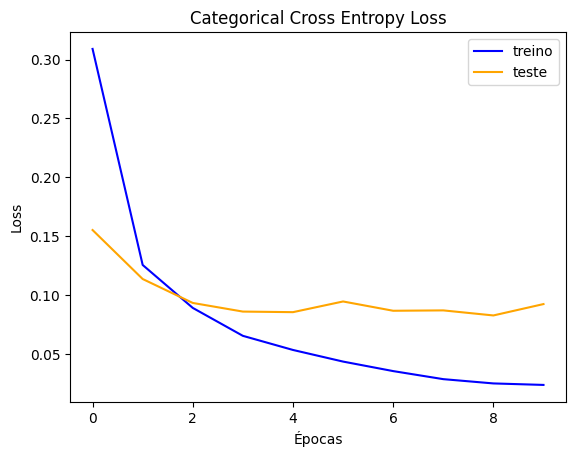

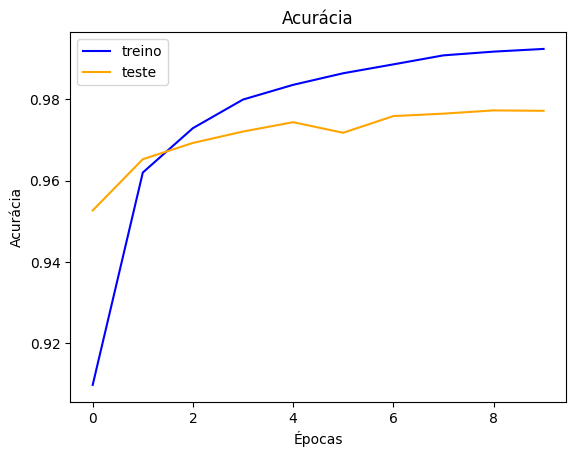


TESTANDO O MODELO 'Rede Neural Totalmente Conectada'...

313/313 [==============================] - 1s 3ms/step - loss: 0.0927 - accuracy: 0.9772
ACURÁCIA FINAL DO MODELO 'Rede Neural Totalmente Conectada': 97.7%



In [ ]:
treinar_modelo(rede_totalmente_conectada, "Rede Neural Totalmente Conectada", 10)

### Rede Neural CNN Básica

In [ ]:
cnn_basica = Sequential()
cnn_basica.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
cnn_basica.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_basica.add(MaxPooling2D((2, 2)))
cnn_basica.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_basica.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_basica.add(MaxPooling2D((2, 2)))
cnn_basica.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_basica.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_basica.add(MaxPooling2D((2, 2)))
cnn_basica.add(Flatten())
cnn_basica.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
cnn_basica.add(Dense(10, activation='softmax'))

In [ ]:
cnn_basica.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

COMEÇANDO O TREINAMENTO DO MODELO 'CNN Basica'...

Epoch 1/10
938/938 [==============================] - 344s 362ms/step - loss: 0.1337 - accuracy: 0.9578 - val_loss: 0.0377 - val_accuracy: 0.9874
Epoch 2/10
938/938 [==============================] - 343s 366ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0244 - val_accuracy: 0.9924
Epoch 3/10
938/938 [==============================] - 342s 364ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.0321 - val_accuracy: 0.9903
Epoch 4/10
938/938 [==============================] - 336s 359ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0318 - val_accuracy: 0.9906
Epoch 5/10
938/938 [==============================] - 350s 373ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0248 - val_accuracy: 0.9919
Epoch 6/10
938/938 [==============================] - 349s 373ms/step - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0289 - val_accuracy: 0.9927
Epoch 7/10
938/938 [==============================] - 345s 368ms/step - l

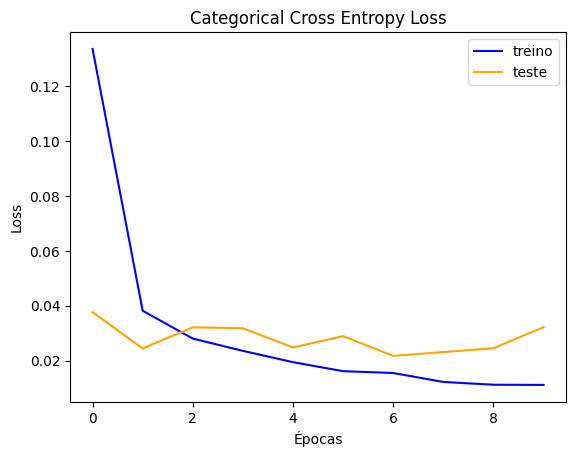

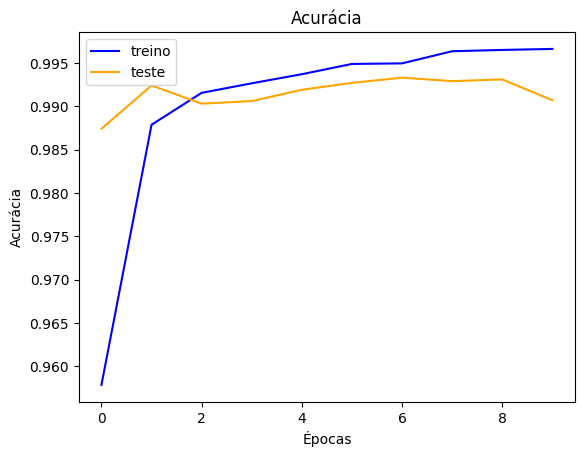


TESTANDO O MODELO 'CNN Basica'...

313/313 [==============================] - 15s 49ms/step - loss: 0.0322 - accuracy: 0.9907
ACURÁCIA FINAL DO MODELO 'CNN Basica': 99.1%



In [ ]:
treinar_modelo(cnn_basica, "CNN Basica", 10)

### Rede Neural CNN com Dropout

In [ ]:
cnn_Dropout = Sequential()
cnn_Dropout.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
cnn_Dropout.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_Dropout.add(MaxPooling2D((2, 2)))
cnn_Dropout.add(Dropout(0.2))
cnn_Dropout.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_Dropout.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_Dropout.add(MaxPooling2D((2, 2)))
cnn_Dropout.add(Dropout(0.2))
cnn_Dropout.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_Dropout.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_Dropout.add(MaxPooling2D((2, 2)))
cnn_Dropout.add(Dropout(0.2))
cnn_Dropout.add(Flatten())
cnn_Dropout.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
cnn_Dropout.add(Dropout(0.2))
cnn_Dropout.add(Dense(10, activation='softmax'))

In [ ]:
cnn_Dropout.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

COMEÇANDO O TREINAMENTO DO MODELO 'CNN com Dropout'...

Epoch 1/10
938/938 [==============================] - 365s 386ms/step - loss: 0.2482 - accuracy: 0.9195 - val_loss: 0.0452 - val_accuracy: 0.9862
Epoch 2/10
938/938 [==============================] - 354s 378ms/step - loss: 0.0634 - accuracy: 0.9816 - val_loss: 0.0282 - val_accuracy: 0.9911
Epoch 3/10
938/938 [==============================] - 350s 373ms/step - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.0269 - val_accuracy: 0.9913
Epoch 4/10
938/938 [==============================] - 351s 375ms/step - loss: 0.0415 - accuracy: 0.9878 - val_loss: 0.0239 - val_accuracy: 0.9920
Epoch 5/10
938/938 [==============================] - 353s 376ms/step - loss: 0.0346 - accuracy: 0.9895 - val_loss: 0.0205 - val_accuracy: 0.9942
Epoch 6/10
938/938 [==============================] - 353s 376ms/step - loss: 0.0320 - accuracy: 0.9908 - val_loss: 0.0255 - val_accuracy: 0.9931
Epoch 7/10
938/938 [==============================] - 346s 369ms/ste

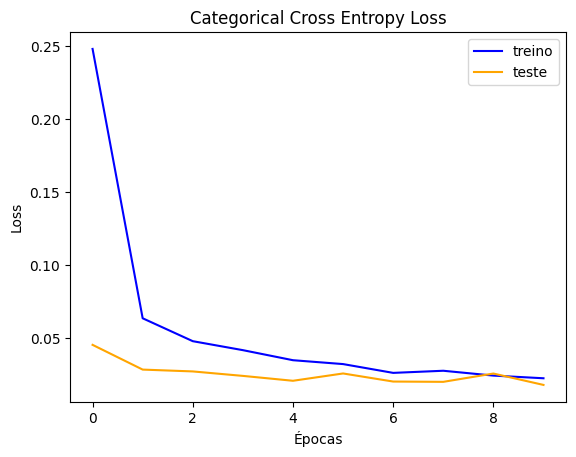

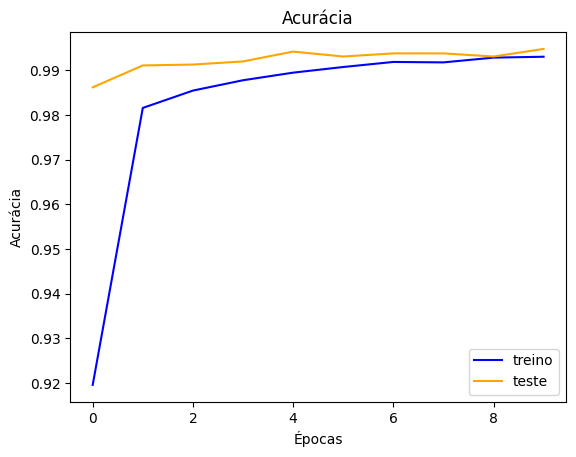


TESTANDO O MODELO 'CNN com Dropout'...

313/313 [==============================] - 15s 49ms/step - loss: 0.0177 - accuracy: 0.9948
ACURÁCIA FINAL DO MODELO 'CNN com Dropout': 99.5%



In [ ]:
treinar_modelo(cnn_Dropout, "CNN com Dropout", 10)

## Considerações Finais

Tabela que agrupa os resultados dos experimentos realizados neste Jupyter:

| Modelo | Acurácia Final Treino | Acurácia Final Teste |
| -------| ----------------------| ---------------------|
| Rede Neural Totalmente Conectada | 0.9924 | 0.9772 |
| CNN Básica | 0.9966 | 0.9907 |
| CNN com Dropout | 0.9930 | 0.9948 |

Análises mais detalhadas dos experimentos e resultados estarão presentes tanto na apresentação feita em sala quanto no no relatório científico do trabalho realizado, em formato de artigo técnico.